**Can we predict the type of article from its content ?**

Install all Libraries we will need.

* We use pandas and numpy for array manipulation and creation
* For the supervised model creation and the train and test data sets split we use sklearn
* We use the Tfid vectorizer from sklearn, to determine how important is every word for the information we are trying to retrieve, by setting weights to each word
* We use matplotlib and seaborn for our graphs and visuals in general
* We use re, for our regular expression creation we use to fine tune our NLP
* We use nltk to get the stopwords that we have to remove from our text, since they offer no contextual meaning, the WordNetLemmatizer which is used for lemmatizing, meaning changing all words to their lemma, which is a crucial process in NLP projects as well as the PorterStemmer, which returns the 'stem' or root of a word.





# Libraries installation and import

In [ ]:
import time

# starting time
start = time.time()

In [ ]:
pip install num2words

     |████████████████████████████████| 101 kB 5.4 MB/s 


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
import num2words
import numpy as np
import nltk 
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import warnings
warnings.filterwarnings('ignore')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')
#https://drive.google.com/drive/folders/1GDqIFyLkBTZj8KsquiAdBJJKakPVLV1h?usp=sharing  use that link to get data files in your drive to continoue running

Mounted at /content/gdrive/


We use the link from the drive to read in our data

# Pre Processing

In [ ]:
cnndata = pd.read_csv('/content/gdrive/MyDrive/NLP Project/CNN_Articels_clean.csv')

In [ ]:
cnndata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37949 entries, 0 to 37948
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Index            37949 non-null  int64 
 1   Author           37949 non-null  object
 2   Date published   37949 non-null  object
 3   Category         37949 non-null  object
 4   Section          37949 non-null  object
 5   Url              37949 non-null  object
 6   Headline         37949 non-null  object
 7   Description      37949 non-null  object
 8   Keywords         37949 non-null  object
 9   Second headline  37949 non-null  object
 10  Article text     37940 non-null  object
dtypes: int64(1), object(10)
memory usage: 3.2+ MB


From the dataset.info, which return the non-null count and data-type for each column, we see that all the column except from the first one is type object, and that the 11th column 'Article Text' has 9 NULL values (37949 - 37940 = 9)

Here we have to fix the issue that while we dont have any object-type data, most of our data appear that way. So what we do is manually change alla data types to what it should be

In [ ]:
cnndata['Author'] = cnndata['Author'].astype('string')
cnndata['Date published'] = cnndata['Date published'].astype('datetime64[ns]')
cnndata['Category'] = cnndata['Category'].astype('category')
cnndata['Section'] = cnndata['Section'].astype('category')
cnndata['Url'] = cnndata['Url'].astype('string')
cnndata['Headline'] = cnndata['Headline'].astype('string')
cnndata['Description'] = cnndata['Description'].astype('string')
cnndata['Keywords'] = cnndata['Keywords'].astype('string')
cnndata['Second headline'] = cnndata['Second headline'].astype('string')
cnndata['Article text'] = cnndata['Article text'].astype('string')

We check the info once again to see if the changes were all made 

In [ ]:
cnndata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37949 entries, 0 to 37948
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Index            37949 non-null  int64         
 1   Author           37949 non-null  string        
 2   Date published   37949 non-null  datetime64[ns]
 3   Category         37949 non-null  category      
 4   Section          37949 non-null  category      
 5   Url              37949 non-null  string        
 6   Headline         37949 non-null  string        
 7   Description      37949 non-null  string        
 8   Keywords         37949 non-null  string        
 9   Second headline  37949 non-null  string        
 10  Article text     37940 non-null  string        
dtypes: category(2), datetime64[ns](1), int64(1), string(7)
memory usage: 2.7 MB


All the changes were implemented succesfully. Now the next thing we have to fix is the existance of NULL values, which are observed in the 11th column. We will make a general method that removes all the rows that contain NULL values.

In [ ]:
cnndata.dropna(inplace=True, how='any')

We chack if all the NULL data is removed

In [ ]:
cnndata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37940 entries, 0 to 37948
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Index            37940 non-null  int64         
 1   Author           37940 non-null  string        
 2   Date published   37940 non-null  datetime64[ns]
 3   Category         37940 non-null  category      
 4   Section          37940 non-null  category      
 5   Url              37940 non-null  string        
 6   Headline         37940 non-null  string        
 7   Description      37940 non-null  string        
 8   Keywords         37940 non-null  string        
 9   Second headline  37940 non-null  string        
 10  Article text     37940 non-null  string        
dtypes: category(2), datetime64[ns](1), int64(1), string(7)
memory usage: 3.0 MB


As we can see all the rows with Null values are removed. Now the next thing we have to take into account is the existance of duplicate articles. This can happen if 2 articles have the same text or url. So we remove all the duplicate articles from the data and keep only the first one that appears.

In [ ]:
cnndata.drop_duplicates(ignore_index=False, keep="first", inplace=True)

In [ ]:
categories = cnndata.Category.unique()
print(categories)
len(categories)

['news', 'business', 'health', 'entertainment', 'sport', 'politics', 'travel', 'vr', 'style']
Categories (9, object): ['business', 'entertainment', 'health', 'news', ..., 'sport', 'style', 'travel',
                         'vr']


9

In [ ]:
sections = cnndata.Section.unique()
print(sections)
len(sections)

['world', 'asia', 'success', 'investing', 'energy', ..., 'app-tech-section', 'skiing', 'equestrian', 'horseracing', 'sailing']
Length: 55
Categories (55, object): ['africa', 'americas', 'app-news-section', 'app-politics-section', ...,
                          'vr', 'weather', 'world', 'worldsport']


55

In [ ]:
cnndata.head(5)

,Index,Author,Date published,Category,Section,Url,Headline,Description,Keywords,Second headline,Article text
0,0,"Jacopo Prisco, CNN",2021-07-15 02:46:59,news,world,https://www.cnn.com/2021/07/14/world/tusimple-...,"There's a shortage of truckers, but TuSimple t...",The e-commerce boom has exacerbated a global t...,"world, There's a shortage of truckers, but TuS...","There's a shortage of truckers, but TuSimple t...","(CNN)Right now, there's a shortage of truck d..."
1,1,"Stephanie Bailey, CNN",2021-05-12 07:52:09,news,world,https://www.cnn.com/2021/05/12/world/ironhand-...,Bioservo's robotic 'Ironhand' could protect fa...,Working in a factory can mean doing the same t...,"world, Bioservo's robotic 'Ironhand' could pro...",A robotic 'Ironhand' could protect factory wor...,(CNN)Working in a factory or warehouse can me...
2,2,"Words by Stephanie Bailey, video by Zahra Jamshed",2021-06-16 02:51:30,news,asia,https://www.cnn.com/2021/06/15/asia/swarm-robo...,This swarm of robots gets smarter the more it ...,"In a Hong Kong warehouse, a swarm of autonomou...","asia, This swarm of robots gets smarter the mo...",This swarm of robots gets smarter the more it ...,"(CNN)In a Hong Kong warehouse, a swarm of aut..."
3,3,Kathryn Vasel,2022-03-18 14:37:21,business,success,https://www.cnn.com/2022/03/18/success/pandemi...,"Two years later, remote work has changed milli...",Here's a look at how the pandemic reshaped peo...,"success, Two years later, remote work has chan...","Two years later, remote work has changed milli...",The pandemic thrust the working world into a n...
4,4,"Paul R. La Monica, CNN Business",2022-03-19 11:41:08,business,investing,https://www.cnn.com/2022/03/19/investing/march...,Why March is so volatile for stocks - CNN,March Madness isn't just for college basketbal...,"investing, Why March is so volatile for stocks...",Why March is so volatile for stocks,New York (CNN Business)March Madness isn't jus...


# Processing

Now we will be trying to predict the Category of an article. Since we will be mainly taking text as input for the prediction, we have to worry about data leakage in the case that the text contains the category or section word in it. In the authors and keywords category, we might contain the category/section name, so we have to remove those names from the specific categories.

In [ ]:
def clean1(auth, keywords):

    auth_clean = auth.lower()
    keyw_clean = keywords.lower()

    # Remove Category/Section names
    remove_words = []
    remove_words.extend(cnndata.Category.unique())
    remove_words.extend(cnndata.Section.unique())

    # more words to remove (we include words like cnn; beacuse they are typos detected in the data)
    remove_words.extend(['cnn','by', 'cnn;'])
    remove_words = [word.lower() for word in remove_words]

    #We tokenise each string, and look through every item of the token to search for removed words
    auth_clean = ' '.join([word for word in word_tokenize(auth_clean) if word not in remove_words])
    keyw_clean = ' '.join([word for word in word_tokenize(keyw_clean) if word not in remove_words])
    
    #split names and keywords
    authors = re.split(',',auth_clean)
    keywords = re.split(',', keyw_clean)

    # Remove everything that is not a letter
    authors = [re.sub(r'[^a-z]', ' ', author) for author in authors]
    keywords = [re.sub(r'[^a-z]', ' ', key) for key in keywords]

    # concat names and words with ','
    authors = ", ".join(authors)
    keywords = ", ".join(keywords)


    if authors != '':
      if authors[-2] == ',':
        authors = authors[:-2]
    if keywords!= '':
      if keywords[-2] == ',':
        keywords = keywords[:-2]

     
    return authors, keywords

In [ ]:
from tqdm import tqdm 
for index in tqdm(cnndata.index):
    
    text_author = cnndata.loc[index,'Author']
    text_keywords = cnndata.loc[index,'Keywords']
    cnndata.loc[index,'Author'],  cnndata.loc[index,'Keywords']= clean1(text_author, text_keywords)

100%|██████████| 37940/37940 [04:44<00:00, 133.44it/s]


Here we can actually see the difference between before and after the Author and Keywords cleaning (most on the author part)

In [ ]:
cnndata.head(5)

,Index,Author,Date published,Category,Section,Url,Headline,Description,Keywords,Second headline,Article text
0,0,jacopo prisco,2021-07-15 02:46:59,news,world,https://www.cnn.com/2021/07/14/world/tusimple-...,"There's a shortage of truckers, but TuSimple t...",The e-commerce boom has exacerbated a global t...,", there s a shortage of truckers , but tusi...","There's a shortage of truckers, but TuSimple t...","(CNN)Right now, there's a shortage of truck d..."
1,1,stephanie bailey,2021-05-12 07:52:09,news,world,https://www.cnn.com/2021/05/12/world/ironhand-...,Bioservo's robotic 'Ironhand' could protect fa...,Working in a factory can mean doing the same t...,", bioservo s robotic ironhand could prote...",A robotic 'Ironhand' could protect factory wor...,(CNN)Working in a factory or warehouse can me...
2,2,"words stephanie bailey , video zahra jamshed",2021-06-16 02:51:30,news,asia,https://www.cnn.com/2021/06/15/asia/swarm-robo...,This swarm of robots gets smarter the more it ...,"In a Hong Kong warehouse, a swarm of autonomou...",", this swarm of robots gets smarter the more ...",This swarm of robots gets smarter the more it ...,"(CNN)In a Hong Kong warehouse, a swarm of aut..."
3,3,kathryn vasel,2022-03-18 14:37:21,business,success,https://www.cnn.com/2022/03/18/success/pandemi...,"Two years later, remote work has changed milli...",Here's a look at how the pandemic reshaped peo...,", two years later , remote work has changed ...","Two years later, remote work has changed milli...",The pandemic thrust the working world into a n...
4,4,paul r la monica,2022-03-19 11:41:08,business,investing,https://www.cnn.com/2022/03/19/investing/march...,Why March is so volatile for stocks - CNN,March Madness isn't just for college basketbal...,", why march is so volatile for stocks",Why March is so volatile for stocks,New York (CNN Business)March Madness isn't jus...


After cleaning the Aythor and Keywords from the words that could leak the data its time to 'clean' the headline, second healdine, description and the actual text. We will again clean the text by removing the same words as before, all special characters and changing the numbers to text, in order to eliminate eveything but text. We will also make all words lowercase so we get get rid of the case-sensitive processes problems, tokenise the text and remove all the stopwords, which are taken from the nltk library, which are words that dont add any meaning to the text. Finally we will be lemmatizing all words, to increase our predictions accuracy and apply stemming, which returns all words to their root form which is used for text normalization.

In [ ]:
def clean2(text):
    
    # Lowercasing
    text_clean = text.lower()
    
    # Converting numbers to words
    text_clean = ' '.join([num2words.num2words(i) if i.isdigit() else i for i in word_tokenize(text_clean)])

    # Remove everything non-text
    text_clean = re.sub(r'[^a-z]', ' ', text_clean)

    # Remove stop words, which add no value to the text information 
    stop_words = set(nltk.corpus.stopwords.words("english"))
    text_clean = ' '.join([word for word in text_clean.split() if word not in stop_words])

    #We tokenise the cleaned text, in order to use it as input for he lemmatization
    text_words = word_tokenize(text_clean)

    #Lemmatization
    wordnet_lemmatizer = WordNetLemmatizer()
    lemmatized_list = []
     
    for word in text_words:
        lemmatized_list.append(wordnet_lemmatizer.lemmatize(word, pos="v"))

    text_clean = " ".join(lemmatized_list)
    
    #Stemming 
    stemmer = PorterStemmer()
    stemmer.stem(text_clean)
     
    return text_clean

We once again have to change all the column types, since they changed from the processing process, just so we can execute the data clearing below with no issues (I had issues when i didnt do it)

In [ ]:
cnndata['Author'] = cnndata['Author'].astype('string')
cnndata['Date published'] = cnndata['Date published'].astype('datetime64[ns]')
cnndata['Category'] = cnndata['Category'].astype('category')
cnndata['Section'] = cnndata['Section'].astype('category')
cnndata['Url'] = cnndata['Url'].astype('string')
cnndata['Headline'] = cnndata['Headline'].astype('string')
cnndata['Description'] = cnndata['Description'].astype('string')
cnndata['Keywords'] = cnndata['Keywords'].astype('string')
cnndata['Second headline'] = cnndata['Second headline'].astype('string')
cnndata['Article text'] = cnndata['Article text'].astype('string')

In [ ]:
for index in tqdm(cnndata.index):
    
    text_headline = cnndata.loc[index,'Headline']
    cnndata.loc[index,'Headline'] = clean2(text_headline)
    
    text_headline2 = cnndata.loc[index,'Second headline']
    cnndata.loc[index,'Second headline'] = clean2(text_headline2)
    
    text_description = cnndata.loc[index,'Description']
    cnndata.loc[index,'Description'] = clean2(text_description)
    
    text_article = cnndata.loc[index,'Article text']
    cnndata.loc[index,'Article text'] = clean2(text_article)

100%|██████████| 37940/37940 [30:03<00:00, 21.03it/s]


In [ ]:
cnndata.head(5)

,Index,Author,Date published,Category,Section,Url,Headline,Description,Keywords,Second headline,Article text
0,0,jacopo prisco,2021-07-15 02:46:59,news,world,https://www.cnn.com/2021/07/14/world/tusimple-...,shortage truckers tusimple think solution driv...,e commerce boom exacerbate global truck driver...,", there s a shortage of truckers , but tusi...",shortage truckers tusimple think solution driv...,cnn right shortage truck drivers us worldwide ...
1,1,stephanie bailey,2021-05-12 07:52:09,news,world,https://www.cnn.com/2021/05/12/world/ironhand-...,bioservo robotic ironhand could protect factor...,work factory mean task could lead chronic inju...,", bioservo s robotic ironhand could prote...",robotic ironhand could protect factory workers...,cnn work factory warehouse mean task repetitio...
2,2,"words stephanie bailey , video zahra jamshed",2021-06-16 02:51:30,news,asia,https://www.cnn.com/2021/06/15/asia/swarm-robo...,swarm robots get smarter work cnn,hong kong warehouse swarm autonomous robots wo...,", this swarm of robots gets smarter the more ...",swarm robots get smarter work,cnn hong kong warehouse swarm autonomous robot...
3,3,kathryn vasel,2022-03-18 14:37:21,business,success,https://www.cnn.com/2022/03/18/success/pandemi...,two years later remote work change millions ca...,look pandemic reshape people career ways never...,", two years later , remote work has changed ...",two years later remote work change millions ca...,pandemic thrust work world new reality march t...
4,4,paul r la monica,2022-03-19 11:41:08,business,investing,https://www.cnn.com/2022/03/19/investing/march...,march volatile stock cnn,march madness n college basketball fan phrase ...,", why march is so volatile for stocks",march volatile stock,new york cnn business march madness n college ...


We now check if we have an imbalanced data set

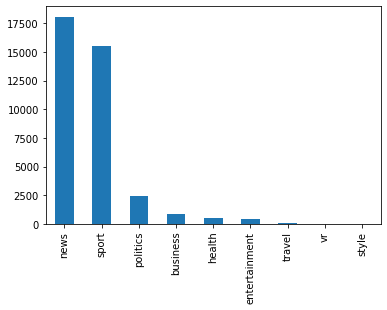

In [ ]:
cnndata.Category.value_counts().plot(kind='bar');

The bar chart is more clear so i will use that

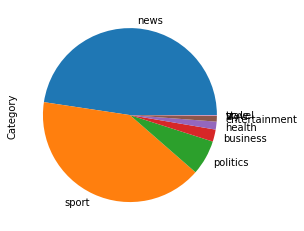

In [ ]:
cnndata.Category.value_counts().plot(kind='pie')

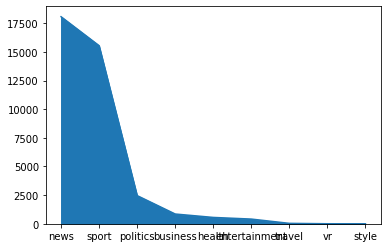

In [ ]:
cnndata.Category.value_counts().plot(kind='area')

As we can see, the vr and style categories have almost no articles. SO we drop them.

In [ ]:
cnndata = cnndata[cnndata.Category != 'vr']
cnndata = cnndata[cnndata.Category != 'style']

# Model Training

By now the raw data we had at the start of the process is now cleaned and processed, so it only contains the vital information for the model training. Next thing we do is split the data to train and test sets.

In [ ]:
# Category to number mapping using pandas cat.codes
cnndata['Category_code'] = cnndata.Category
cnndata['Category_code'] = cnndata.Category.cat.codes


cnndata['Section_code'] = cnndata.Section
cnndata['Section_code'] = cnndata.Section.cat.codes

In [ ]:
cnndata.head(5)

,Index,Author,Date published,Category,Section,Url,Headline,Description,Keywords,Second headline,Article text,Category_code,Section_code
0,0,jacopo prisco,2021-07-15 02:46:59,news,world,https://www.cnn.com/2021/07/14/world/tusimple-...,shortage truckers tusimple think solution driv...,e commerce boom exacerbate global truck driver...,", there s a shortage of truckers , but tusi...",shortage truckers tusimple think solution driv...,cnn right shortage truck drivers us worldwide ...,3,53
1,1,stephanie bailey,2021-05-12 07:52:09,news,world,https://www.cnn.com/2021/05/12/world/ironhand-...,bioservo robotic ironhand could protect factor...,work factory mean task could lead chronic inju...,", bioservo s robotic ironhand could prote...",robotic ironhand could protect factory workers...,cnn work factory warehouse mean task repetitio...,3,53
2,2,"words stephanie bailey , video zahra jamshed",2021-06-16 02:51:30,news,asia,https://www.cnn.com/2021/06/15/asia/swarm-robo...,swarm robots get smarter work cnn,hong kong warehouse swarm autonomous robots wo...,", this swarm of robots gets smarter the more ...",swarm robots get smarter work,cnn hong kong warehouse swarm autonomous robot...,3,5
3,3,kathryn vasel,2022-03-18 14:37:21,business,success,https://www.cnn.com/2022/03/18/success/pandemi...,two years later remote work change millions ca...,look pandemic reshape people career ways never...,", two years later , remote work has changed ...",two years later remote work change millions ca...,pandemic thrust work world new reality march t...,0,45
4,4,paul r la monica,2022-03-19 11:41:08,business,investing,https://www.cnn.com/2022/03/19/investing/march...,march volatile stock cnn,march madness n college basketball fan phrase ...,", why march is so volatile for stocks",march volatile stock,new york cnn business march madness n college ...,0,30


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cnndata['Article text'], 
                                                    cnndata['Category_code'], 
                                                    test_size=0.2, 
                                                    random_state=8)

We use **TfidfVectorizer** from NLTK to weigth each token and use those weights for the classification. This method measures each words frequency and Inverse Document Frequency.
* Frequency: Number of time a word appears in a text document.
* Inverse Document Frequency: Measure the word is a rare word or common word in a document.

In [ ]:
tfidf = TfidfVectorizer(ngram_range = (1,2), #We extract both unigrams and bigrams
                        lowercase = False, #We have already done that in the pre-processing
                        max_df = 0.75, #If a word appears in more than 75% of the articles its so common it needs to be disregareded
                        min_df = 50, #Same as if a word appears in less than 50 articles
                        max_features= 350, #No more than 350 words are to be used as features to be weighted
                        analyzer='word',
                        vocabulary=None,
                        sublinear_tf=True) 
#All those values were changed many times to find the best ones for good metrics

We now get the training features that have learned vocabulary and idf as a Tf-idf-weighted document-term matrix.

In [ ]:
features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train

features_test = tfidf.transform(X_test).toarray()
labels_test = y_test

**For Logistic regression**

In [ ]:
lrstart = time.time()

In [ ]:
lr = LR() 
lr.fit(features_train, labels_train)

LogisticRegression()

In [ ]:
lr_predict = lr.predict(features_test)
print(accuracy_score(labels_train, lr.predict(features_train)))

0.9227271229446073


In [ ]:
print(classification_report(labels_test, lr_predict))

              precision    recall  f1-score   support

           0       0.76      0.40      0.53       166
           1       0.90      0.32      0.47        84
           2       0.77      0.28      0.40       120
           3       0.89      0.96      0.93      3668
           4       0.80      0.70      0.75       476
           5       0.97      0.98      0.98      3068
           7       0.00      0.00      0.00         5

    accuracy                           0.92      7587
   macro avg       0.73      0.52      0.58      7587
weighted avg       0.91      0.92      0.91      7587



In [ ]:
conf_matrix = confusion_matrix(labels_test, lr_predict)
print(conf_matrix)

[[  67    0    3   89    3    4    0]
 [   2   27    0   42    1   12    0]
 [   2    0   33   79    2    4    0]
 [  11    3    5 3515   74   60    0]
 [   5    0    1  135  334    1    0]
 [   0    0    1   68    3 2996    0]
 [   1    0    0    4    0    0    0]]


In [ ]:
lrstop = time.time()
time2 = lrstop - lrstart
print('The Logistic Regression training took:', time2)

The Logistic Regression training took: 11.342271089553833


**For Linear Support Vector Classification**

In [ ]:
lsvcstart = time.time()

In [ ]:
lsvc = svm.LinearSVC() 
lsvc.fit(features_train, labels_train)

LinearSVC()

In [ ]:
lsvc_predict = lsvc.predict(features_test)
print(accuracy_score(labels_train, lsvc.predict(features_train)))

0.9228918838764952


In [ ]:
print(classification_report(labels_test, lsvc_predict))

              precision    recall  f1-score   support

           0       0.75      0.42      0.53       166
           1       0.82      0.33      0.47        84
           2       0.71      0.24      0.36       120
           3       0.89      0.95      0.92      3668
           4       0.79      0.69      0.74       476
           5       0.97      0.98      0.98      3068
           7       0.00      0.00      0.00         5

    accuracy                           0.92      7587
   macro avg       0.71      0.52      0.57      7587
weighted avg       0.91      0.92      0.91      7587



In [ ]:
conf_matrix = confusion_matrix(labels_test, lsvc_predict)
print(conf_matrix)

[[  69    1    3   84    3    6    0]
 [   2   28    0   41    1   12    0]
 [   2    0   29   84    2    3    0]
 [  13    5    5 3497   78   70    0]
 [   5    0    3  139  328    1    0]
 [   0    0    1   59    2 3006    0]
 [   1    0    0    4    0    0    0]]


In [ ]:
lsvcstop = time.time()
time3 = lsvcstop - lsvcstart
print('The Linear Support Vector Classification training took:', time3)

The Linear Support Vector Classification training took: 1.6968159675598145


**For Support Vector Classification**

In [ ]:
svcstart = time.time()

In [ ]:
svc = svm.SVC() 
svc.fit(features_train, labels_train)

SVC()

In [ ]:
svc_predict = svc.predict(features_test)
print(accuracy_score(labels_train, svc.predict(features_train)))

0.9707055063103437


In [ ]:
print(classification_report(labels_test, svc_predict))

              precision    recall  f1-score   support

           0       0.88      0.46      0.60       166
           1       0.87      0.24      0.37        84
           2       0.85      0.29      0.43       120
           3       0.90      0.97      0.93      3668
           4       0.86      0.73      0.79       476
           5       0.98      0.98      0.98      3068
           7       0.00      0.00      0.00         5

    accuracy                           0.93      7587
   macro avg       0.76      0.52      0.59      7587
weighted avg       0.93      0.93      0.92      7587



In [ ]:
conf_matrix = confusion_matrix(labels_test, svc_predict)
print(conf_matrix)

[[  76    0    0   83    3    4    0]
 [   0   20    0   55    1    8    0]
 [   1    0   35   78    3    3    0]
 [   5    2    3 3551   49   58    0]
 [   4    0    2  121  347    2    0]
 [   0    1    1   57    1 3008    0]
 [   0    0    0    5    0    0    0]]


In [ ]:
svcstop = time.time()
time4 = svcstop - svcstart
print('The Support Vector Classification training took:', time4)

The Support Vector Classification training took: 268.478884935379


# Visualisation of Results

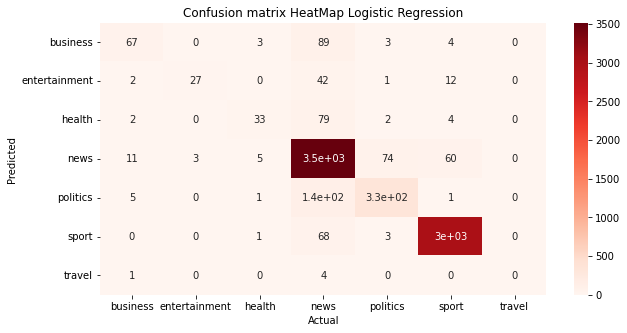

In [ ]:
aux_df = cnndata[['Category', 'Category_code']].drop_duplicates().sort_values('Category_code')
conf_matrix = confusion_matrix(labels_test, lr_predict)
plt.figure(figsize=(10,5))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Category'].values, 
            yticklabels=aux_df['Category'].values,
            cmap="Reds")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix HeatMap Logistic Regression')
plt.show()

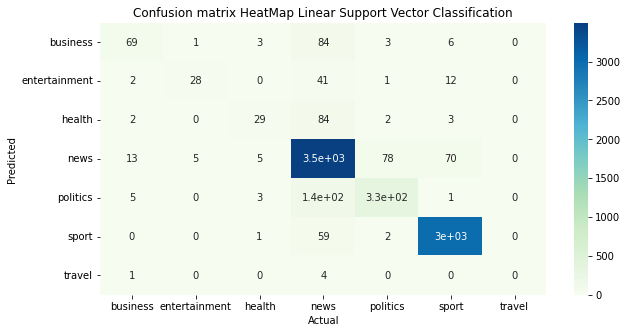

In [ ]:
aux_df = cnndata[['Category', 'Category_code']].drop_duplicates().sort_values('Category_code')
conf_matrix = confusion_matrix(labels_test, lsvc_predict)
plt.figure(figsize=(10,5))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Category'].values, 
            yticklabels=aux_df['Category'].values,
            cmap="GnBu")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix HeatMap Linear Support Vector Classification')
plt.show()

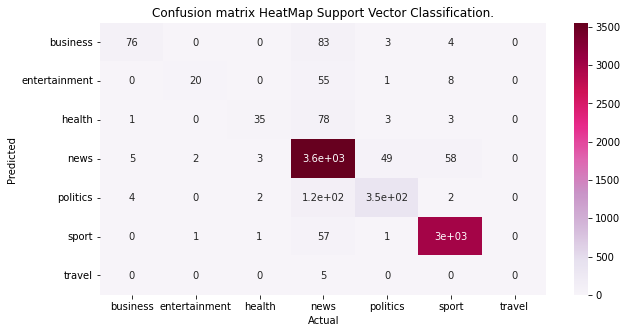

In [ ]:
aux_df = cnndata[['Category', 'Category_code']].drop_duplicates().sort_values('Category_code')
conf_matrix = confusion_matrix(labels_test, svc_predict)
plt.figure(figsize=(10,5))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Category'].values, 
            yticklabels=aux_df['Category'].values,
            cmap="PuRd")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix HeatMap Support Vector Classification.')
plt.show()

In [ ]:
end = time.time()

# total time taken
print(f"Runtime of the program is {end - start}")

Runtime of the program is 2497.1485426425934


We tried Logistic regression, Support Vector Classification and Linear Support Vector Classification.